In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Teraz wyznaczam logarytmiczne stopy zwrotu i tworzę funckje pomocnicze, żeby sprawdzić czy dane wyglądają sensownie.
Wykorzystuję do tego funkcje pomocnicze z poprzednich ćwiczeń z tą różnicą, iż zamiast zwracać zwroty w procentach, będę je zwracac
w ułamkach.

In [2]:
# Funkcja pomocznica do liczenia zwrotów
def compute_returns(series: pd.Series) -> pd.DataFrame:
    returns = pd.DataFrame(index=series.index)
    returns["simple_frac"] = (series - series.shift(1)) / series.shift(1)
    returns["log_frac"] = np.log(series / series.shift(1))
    return returns

# Funkcja pomocnicza do rysowania wykresów zwrotów
def plot_returns(df: pd.DataFrame, title: str):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df["simple_frac"], label="Stopa prosta")
    ax.plot(df.index, df["log_frac"], label="Stopa logarytmiczna")
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Data")
    ax.set_ylabel("Stopa zwrotu (%)")
    ax.legend()

    plt.tight_layout()
    plt.show()

# VaR i ES dla Bitcoina 2011-2025

In [3]:
CSV_PATH = Path('../data/btcusd_d.csv')

data_btcusdt_frame_daily: pd.DataFrame = pd.read_csv(
        CSV_PATH,
        usecols=['datetime', 'open', 'high', 'low', 'close'],
        parse_dates=['datetime']
    )
# Ustawiam odpowiednio indeks
data_btcusdt_frame_daily.set_index('datetime').sort_index().astype('float64')  

# konwersja kolumny 'Data' na datetime, bo bez tego są błedne daty
data_btcusdt_frame_daily['datetime'] = pd.to_datetime(data_btcusdt_frame_daily['datetime'], errors='coerce')

# usuwam ewentualne błędne wiersze bez dat
data_btcusdt_frame_daily = data_btcusdt_frame_daily.dropna(subset=['datetime'])

# indeks i sortuje
data_btcusdt_frame_daily = (
    data_btcusdt_frame_daily
    .set_index('datetime')
    .sort_index()
    .astype('float64')
)

# Początkowe 10 wierszy
print(data_btcusdt_frame_daily.head(10))

               open     high      low    close
datetime                                      
2010-07-17  0.04951  0.04951  0.04951  0.04951
2010-07-18  0.08584  0.08584  0.08584  0.08584
2010-07-19  0.08080  0.08080  0.08080  0.08080
2010-07-20  0.07474  0.07474  0.07474  0.07474
2010-07-21  0.07921  0.07921  0.07921  0.07921
2010-07-22  0.05050  0.05050  0.05050  0.05050
2010-07-23  0.06262  0.06262  0.06262  0.06262
2010-07-24  0.05454  0.05454  0.05454  0.05454
2010-07-25  0.05050  0.05050  0.05050  0.05050
2010-07-26  0.05600  0.05600  0.05600  0.05600


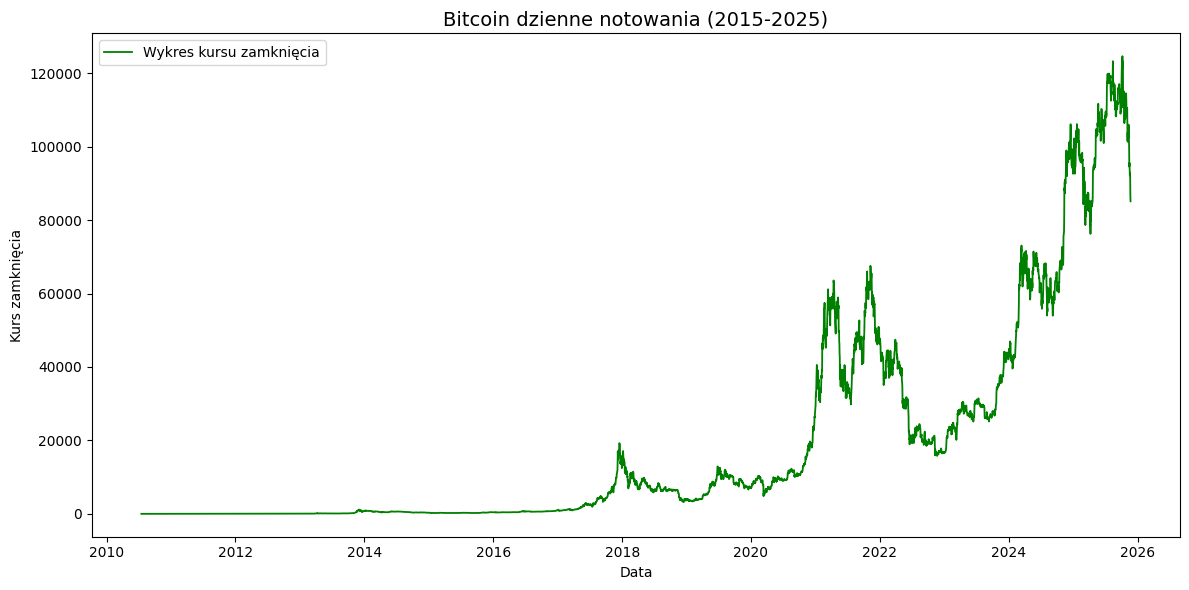

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(
#     data_btcusdt_frame_daily.index,
#     data_btcusdt_frame_daily['close'],
#     label='Wykres kursu zamknięcia',
#     color='green',
#     linewidth=1.3
# )

# ax.set_title('Bitcoin dzienne notowania (2015-2025)', fontsize=14)
# ax.set_xlabel('Data')
# ax.set_ylabel('Kurs zamknięcia')
# ax.legend()
# plt.tight_layout()
# plt.show()


    "fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))\n",
    "\n",
    "# Wykres kursu zamknięcia (Liniowa)\n",
    "ax1.plot(\n",
    "    data_btcusdt_frame_daily.index,\n",
    "    data_btcusdt_frame_daily['close'],\n",
    "    label='Wykres kursu zamknięcia (Liniowa)',\n",
    "    color='green',\n",
    "    linewidth=1.3\n",
    ")\n",
    "\n",
    "ax1.set_title('Bitcoin dzienne notowania (2015-2025) - Liniowa', fontsize=14)\n",
    "ax1.set_xlabel('Data')\n",
    "ax1.set_ylabel('Kurs zamknięcia')\n",
    "ax1.legend()\n",
    "\n",
    "# Wykres kursu zamknięcia (Logarytmiczna)\n",
    "ax2.plot(\n",
    "    data_btcusdt_frame_daily.index,\n",
    "    data_btcusdt_frame_daily['close'],\n",
    "    label='Wykres kursu zamknięcia (Logarytmiczna)',\n",
    "    color='blue',\n",
    "    linewidth=1.3\n",
    ")\n",
    "\n",
    "ax2.set_yscale('log')\n",
    "ax2.set_title('Bitcoin dzienne notowania (2015-2025) - Logarytmiczna', fontsize=14)\n",
    "ax2.set_xlabel('Data')\n",
    "ax2.set_ylabel('Kurs zamknięcia')\n",
    "ax2.legend()\n",
    "\n",
    "plt.tight_layout()\n",
    "plt.show()"

# Przygotowanie potrzebnych danych

In [ ]:
# Liczę zwroty dzienne
returns_daily_btcusd = compute_returns(data_btcusdt_frame_daily["close"])
print(returns_daily_btcusd.tail(10))

plot_returns(returns_daily_btcusd, "Bitcoin - Dzienne stopy zwrotu (2018-2025)")

# Zmieniam zwroty na straty
losses_daily = -returns_daily_btcusd["log_frac"]
# Usuwam NaNy
losses_daily = losses_daily.dropna()
losses = losses_daily.values # przekształcenie, żeby łatwiej pracować na danych

# Prosta metoda historyczna

            simple_frac  log_frac
datetime                         
2025-11-12    -0.013629 -0.013723
2025-11-13    -0.019304 -0.019493
2025-11-14    -0.051138 -0.052492
2025-11-15     0.010595  0.010539
2025-11-16    -0.013963 -0.014061
2025-11-17    -0.021709 -0.021948
2025-11-18     0.008086  0.008054
2025-11-19    -0.015123 -0.015239
2025-11-20    -0.053713 -0.055210
2025-11-21    -0.017404 -0.017557


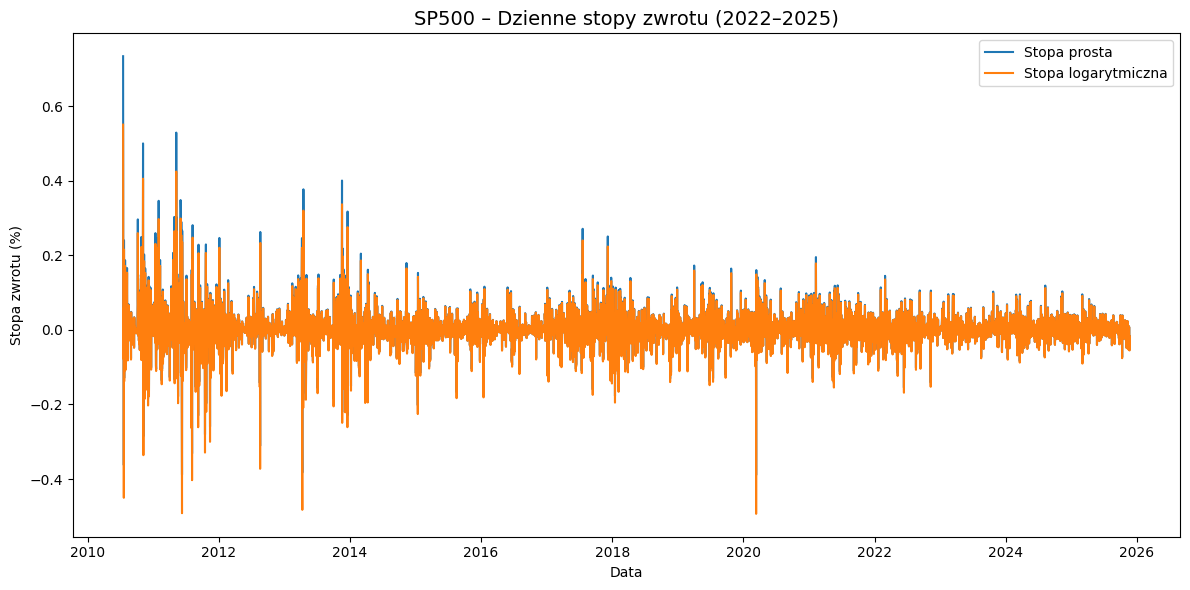

datetime
2011-11-30    0.328921
2011-12-01    0.328921
2011-12-02    0.328921
2011-12-03    0.328921
2011-12-04    0.328921
Name: VaR_weighted, dtype: float64
datetime
2011-11-30    0.395167
2011-12-01    0.394836
2011-12-02    0.394506
2011-12-03    0.394179
2011-12-04    0.393852
Name: ES_weighted, dtype: float64


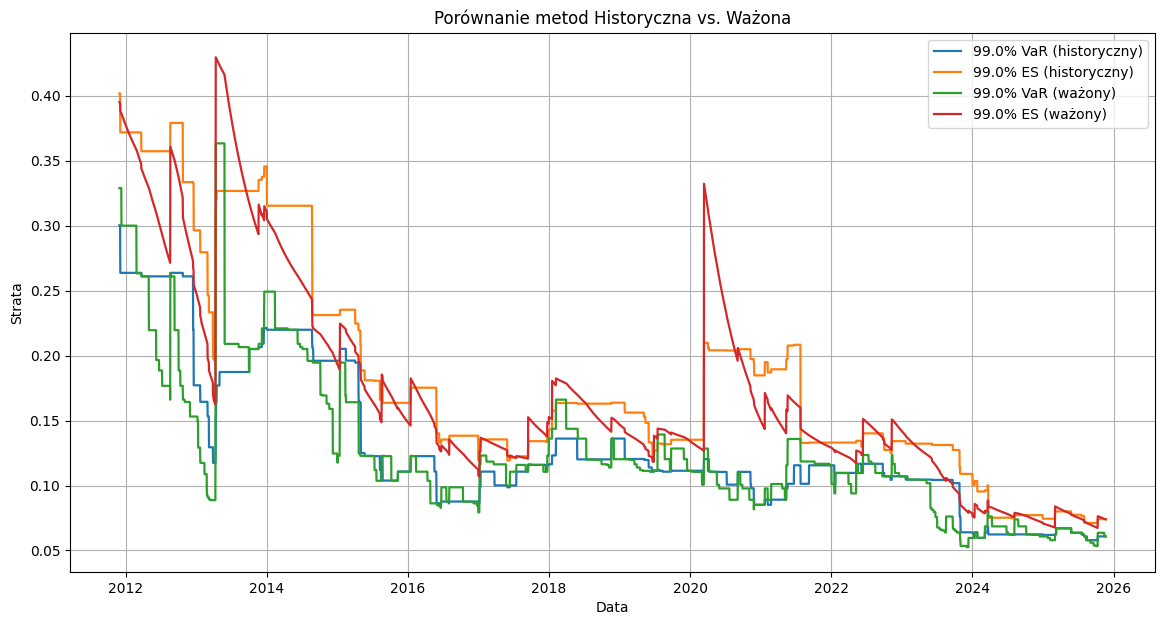

In [ ]:
WINDOW = 500 # ile dni bierzemy pod uwagę, do wyliczenia VaR/ES
QUANTILE_LEVEL = 0.99  # Czyli 99% VaR
QUANTILE_LEVEL_PERCENTAHE = QUANTILE_LEVEL * 100 # Zamiana na procenty, pomocnicza

# var_series = []

# for i in range(WINDOW, len(losses)):
#     window_losses = losses[i-WINDOW:i]
#     var_value = np.quantile(window_losses, QUANTILE_LEVEL)
#     var_series.append(var_value)

# # Konwersja spowrotem do serii pandas by mieć daty jako indeksy
# var_index = losses_daily.index[WINDOW:]
# var_series = pd.Series(var_series, index=var_index)
# print(var_series)

es_series = []
var_series = []

for i in range(WINDOW, len(losses)):
    print(i-WINDOW, i)
    window_losses = losses[i-WINDOW:i]
    
    # VaR tak samo jak wcześniej
    var_value = np.quantile(window_losses, QUANTILE_LEVEL)
    var_series.append(var_value)

    # ES: średnia strata większa niż VaR
    es_value = window_losses[window_losses > var_value].mean()
    es_series.append(es_value)

var_series = pd.Series(var_series, index=losses_daily.index[WINDOW:])
es_series  = pd.Series(es_series, index=losses_daily.index[WINDOW:])

WINDOW = 500 # ile dni bierzemy pod uwagę
QUANTILE_LEVEL = 0.99  # czyli 99% VaR
QUANTILE_LEVEL_PERCENTAHE = QUANTILE_LEVEL * 100
Q_PARAMETER = 0.995

var_list = []
es_list = []

for i in range(WINDOW, len(losses)):
    window_losses = losses[i-WINDOW:i]
    # var_value, es_value = weighted_var_es(window_losses, q=Q_PARAMETER, alpha=QUANTILE_LEVEL)
    var_value, es_value = weighted_var_es_strict(window_losses, q=Q_PARAMETER, alpha=QUANTILE_LEVEL)
    var_list.append(var_value)
    es_list.append(es_value)

index_out = losses_daily.index[WINDOW:]
VaR_w = pd.Series(var_list, index=index_out, name="VaR_weighted")
ES_w = pd.Series(es_list, index=index_out, name="ES_weighted")

print(VaR_w.head())
print(ES_w.head())

plt.figure(figsize=(14,7))

plt.plot(var_series, label=f"{QUANTILE_LEVEL_PERCENTAHE}% VaR (historyczny)", linewidth=1.6)
plt.plot(es_series, label=f"{QUANTILE_LEVEL_PERCENTAHE}% ES (historyczny)", linewidth=1.6)

plt.plot(VaR_w, label=f"{QUANTILE_LEVEL_PERCENTAHE}% VaR (ważony)", linewidth=1.6)
plt.plot(ES_w, label=f"{QUANTILE_LEVEL_PERCENTAHE}% ES (ważony)", linewidth=1.6)

plt.title(f"Porównanie metod Historyczna vs. Ważona")
plt.xlabel("Data")
plt.ylabel("Strata")
plt.legend()
plt.grid(True)
plt.show()

# GARCH(1,1)

**Niedokończone, wykres wydaje mi się na odwrót, czyli COVID-19 crash pokazuje, że strata maleje a po niej strata rośnie. A wedłu mojej intuicji powinno być na owrót. Tak więc była to próba z wykorztsaniem gotowej biblioteki**
DLATEGO PROSZĘ NA DALSZY KOD NIE ZWRACAĆ UWAGI

In [42]:
from arch import arch_model
from scipy.stats import norm
import matplotlib.pyplot as plt

returns = returns_daily["log_frac"].dropna()

# Estymacja modelu GARCH(1,1)
model = arch_model(returns, vol='GARCH', p=1, q=1, mean='constant', dist='normal')
res = model.fit(update_freq=10)
print(res.summary())

sigma_series = res.conditional_volatility
sigma_series.name = "sigma"

# VaR 99%
alpha = 0.99
z = norm.ppf(1 - alpha)
VaR_garch = sigma_series * abs(z)

# ES 99%
ES_garch = sigma_series * (norm.pdf(z) / (1 - alpha))


Iteration:     10,   Func. Count:    136,   Neg. LLF: 208499330149.1003
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7999.421356558703
            Iterations: 22
            Function evaluations: 249
            Gradient evaluations: 18
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               log_frac   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7999.42
Distribution:                  Normal   AIC:                           16006.8
Method:            Maximum Likelihood   BIC:                           16030.5
                                        No. Observations:                 2709
Date:                Sun, Nov 23 2025   Df Residuals:                     2708
Time:                        21:02:26   Df Model:                            1
       

/Users/anteqkois/venvs/myenv/lib/python3.12/site-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001294. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


Początkowe wartości zmienności generowane przez model GARCH(1,1) są niestabilne z uwagi na brak wcześniejszych obserwacji.
Po ok. 20–30 dniach model osiąga stan stacjonarny i od tego momentu prognozy zmienności oraz VaR/ES są stabilne.
Dlatego na wykresie usuwam 30 początkowych dni, by wykres był bardziej czytelny

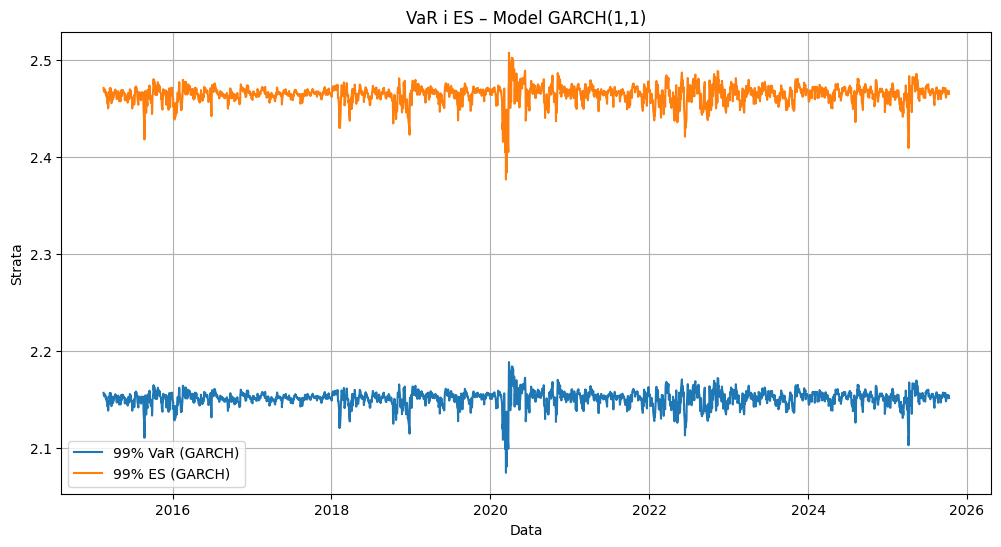

In [43]:
plt.figure(figsize=(12,6))
plt.plot(VaR_garch.iloc[30:], label="99% VaR (GARCH)")
plt.plot(ES_garch.iloc[30:], label="99% ES (GARCH)")
plt.title("VaR i ES – Model GARCH(1,1)")
plt.xlabel("Data")
plt.ylabel("Strata")
plt.legend()
plt.grid(True)
plt.show()